In [1]:
!git clone https://github.com/aymanezz/Climate_Impact_Agriculture_Yield.git


Cloning into 'Climate_Impact_Agriculture_Yield'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 52 (delta 12), reused 20 (delta 6), pack-reused 0
Receiving objects: 100% (52/52), 23.23 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (29/29), done.


In [2]:
import os
os.chdir('Climate_Impact_Agriculture_Yield')


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**loading data in colab**

In [4]:
production1 = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions1.csv')
production2 = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions2.csv')
production3 = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions3.csv')
production = pd.concat([production1,production2,production3],ignore_index=True)
temp_change = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/temperature_change.csv')
land_cover = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/land_cover.csv')
sea_level = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/sea_level.csv')
atmospheric = pd.read_csv('/content/Climate_Impact_Agriculture_Yield/data/modified/Atmospheric.csv')

In [5]:
'''
# Load the data
production = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\production.csv')
temp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\temperature_change.csv')
land_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\land_cover.csv')
precip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')
sea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\sea_level.csv')

'''

"\n# Load the data\nproduction = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\production.csv')\ntemp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\temperature_change.csv')\nland_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\land_cover.csv')\nprecip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')\nsea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\sea_level.csv')\n\n"

In [7]:
production.head()

,Unnamed: 0.1,Unnamed: 0,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0,0,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,2.134430e+05,1.385370e+05,1.225900e+05,1.660570e+05,1.379860e+05,1.739950e+05,1.931680e+05,1.987390e+05,3.248840e+05,3.235890e+05
1,1,1,Afghanistan,"Almonds, in shell",Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,7.152111e+08,7.278068e+08,8.944441e+08,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
2,2,2,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,9.003038e+06,5.843497e+06,5.170855e+06,7.004306e+06,5.820251e+06,7.339134e+06,8.147840e+06,8.382859e+06,1.370364e+07,1.364904e+07
3,3,3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,2.717000e+04,4.673200e+04,3.912400e+04,3.767500e+04,3.963300e+04,3.881100e+04,3.870600e+04,3.905000e+04,3.885600e+04,3.887100e+04
4,4,4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,...,3.709800e+04,4.219800e+04,4.235400e+04,6.650600e+04,8.044900e+04,1.025150e+05,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05


In [11]:
production = production.loc[:, ~production.columns.str.contains('^Unnamed')]

In [13]:
production.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,2.134430e+05,1.385370e+05,1.225900e+05,1.660570e+05,1.379860e+05,1.739950e+05,1.931680e+05,1.987390e+05,3.248840e+05,3.235890e+05
1,Afghanistan,"Almonds, in shell",Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,7.152111e+08,7.278068e+08,8.944441e+08,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
2,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,9.003038e+06,5.843497e+06,5.170855e+06,7.004306e+06,5.820251e+06,7.339134e+06,8.147840e+06,8.382859e+06,1.370364e+07,1.364904e+07
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,2.717000e+04,4.673200e+04,3.912400e+04,3.767500e+04,3.963300e+04,3.881100e+04,3.870600e+04,3.905000e+04,3.885600e+04,3.887100e+04
4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,...,3.709800e+04,4.219800e+04,4.235400e+04,6.650600e+04,8.044900e+04,1.025150e+05,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05


In [14]:
pd.set_option('display.max_rows',100)
production[(production['Area'] == 'Afghanistan')&( production['Item'] == 'Apples')]

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,...,3.709800e+04,4.219800e+04,4.235400e+04,66506.0,80449.0,102515.0,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05
5,Afghanistan,Apples,Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,4424354.0,6084815.0,4850210.0,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
6,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,3.664860e+05,3.664860e+05,3.664860e+05,4.465790e+05,4.951200e+05,5.533700e+05,6.698690e+05,...,1.907597e+06,2.169865e+06,2.177874e+06,3419801.0,4136755.0,5271382.0,6.075515e+06,6.573864e+06,7.807175e+06,7.718053e+06


In [15]:
grouped = production.groupby(['Area', 'Item'])['Element'].sum()
grouped

Area         Item                                                                     
Afghanistan  Agriculture                                                                  Gross Production Value (constant 2014-2016 tho...
             Almonds, in shell                                                            Gross Production Value (constant 2014-2016 tho...
             Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    Gross Production Value (constant 2014-2016 tho...
             Apples                                                                       Gross Production Value (constant 2014-2016 tho...
             Apricots                                                                     Gross Production Value (constant 2014-2016 tho...
                                                                                                                ...                        
Zimbabwe     Unmanufactured tobacco                                      

In [16]:
grouped = production.groupby(['Area', 'Item','Element']).size().reset_index(name='Count')


In [17]:
production.Element.unique()

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [18]:
production['Element'].unique()

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [19]:
production = production[production['Element'] == 'Gross Production Value (constant 2014-2016 thousand I$)']
production.drop(columns = ['Element'],inplace = True)
production.reset_index(drop=True, inplace=True)

<ipython-input-19-aae3743e88d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production.drop(columns = ['Element'],inplace = True)


In [20]:
production.head()

,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,"Almonds, in shell",1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,1.286500e+08,...,213443.0,138537.0,122590.0,166057.0,137986.0,173995.0,193168.0,198739.0,324884.0,323589.0
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,1.286500e+08,...,27170.0,46732.0,39124.0,37675.0,39633.0,38811.0,38706.0,39050.0,38856.0,38871.0
2,Afghanistan,Apples,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,1.316900e+04,...,37098.0,42198.0,42354.0,66506.0,80449.0,102515.0,118153.0,127845.0,151830.0,150096.0
3,Afghanistan,Apricots,2.621000e+04,2.621000e+04,2.621000e+04,3.210700e+04,3.554700e+04,3.964200e+04,4.807900e+04,4.865200e+04,...,73715.0,73715.0,71820.0,14656.0,107965.0,89347.0,105955.0,107942.0,169946.0,139655.0
4,Afghanistan,Barley,7.364400e+04,7.364400e+04,7.364400e+04,7.403400e+04,7.403400e+04,7.306000e+04,6.955300e+04,7.033200e+04,...,100141.0,101504.0,78515.0,58809.0,18508.0,11062.0,24076.0,24890.0,12684.0,21431.0


In [35]:
melted_production = pd.melt(production, id_vars=['Area','Item'],var_name='Year', value_name='production')

In [36]:
melted_production.head()

,Area,Item,Year,production
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08
2,Afghanistan,Apples,Y1961,7.127000e+03
3,Afghanistan,Apricots,Y1961,2.621000e+04
4,Afghanistan,Barley,Y1961,7.364400e+04


In [37]:
pd.set_option('display.max_rows',10)
temp_change


,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
16,Afghanistan,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,-0.398,-0.513,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
33,Albania,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,0.062,-0.036,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
50,Algeria,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,-0.065,0.247,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
67,American Samoa,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,-0.185,0.145,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951
84,Andorra,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,0.005,-0.158,...,1.917,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,Low Income Food Deficit Countries,-0.081,-0.189,0.067,-0.215,-0.232,0.081,-0.227,-0.268,0.326,...,0.834,1.081,1.263,1.259,1.093,1.167,1.038,1.274,1.058,1.389
4776,Net Food Importing Developing Countries,-0.016,-0.098,0.112,-0.208,-0.165,0.127,-0.240,-0.296,0.260,...,0.962,1.257,1.348,1.280,1.198,1.325,1.222,1.309,1.058,1.505
4793,Annex I countries,0.458,0.164,0.177,-0.363,-0.408,0.271,-0.013,0.056,-0.527,...,1.130,1.618,2.102,1.614,1.390,1.610,2.223,1.620,1.615,2.003
4810,Non-Annex I countries,0.027,-0.062,0.153,-0.175,-0.091,0.151,-0.193,-0.250,0.220,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583


we will focus only for the yearly values in the data

In [38]:
temp_change = temp_change[temp_change['Months'] == 'Meteorological year']

KeyError: 'Months'

In [39]:
temp_change.columns

Index(['Area', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [40]:
temp_change.drop(columns=['Unnamed: 0','Months','Element'],inplace = True)

KeyError: "['Unnamed: 0', 'Months', 'Element'] not found in axis"

In [41]:
temp_change.columns

Index(['Area', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [42]:

# Reshape using pd.melt()
melted_temp = pd.melt(temp_change, id_vars=['Area'],var_name='Year', value_name='Temperature Change')

In [43]:
melted_temp

,Area,Year,Temperature Change
0,Afghanistan,Y1961,-0.126
1,Albania,Y1961,0.635
2,Algeria,Y1961,0.155
3,American Samoa,Y1961,0.121
4,Andorra,Y1961,0.756
...,...,...,...
17887,Low Income Food Deficit Countries,Y2023,1.389
17888,Net Food Importing Developing Countries,Y2023,1.505
17889,Annex I countries,Y2023,2.003
17890,Non-Annex I countries,Y2023,1.583


In [44]:
melted_production

,Area,Item,Year,production
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08
2,Afghanistan,Apples,Y1961,7.127000e+03
3,Afghanistan,Apricots,Y1961,2.621000e+04
4,Afghanistan,Barley,Y1961,7.364400e+04
...,...,...,...,...
1285069,Net Food Importing Developing Countries,Oilcrops Primary,Y2022,3.001882e+07
1285070,Net Food Importing Developing Countries,"Roots and Tubers, Total",Y2022,4.482258e+07
1285071,Net Food Importing Developing Countries,Sugar Crops Primary,Y2022,1.084941e+07
1285072,Net Food Importing Developing Countries,Vegetables and Fruit Primary,Y2022,1.026037e+08


In [45]:
merged = pd.merge(melted_production,melted_temp,on=['Area','Year'])

In [46]:
merged

,Area,Item,Year,production,Temperature Change
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08,-0.126
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08,-0.126
2,Afghanistan,Apples,Y1961,7.127000e+03,-0.126
3,Afghanistan,Apricots,Y1961,2.621000e+04,-0.126
4,Afghanistan,Barley,Y1961,7.364400e+04,-0.126
...,...,...,...,...,...
1266779,Net Food Importing Developing Countries,Oilcrops Primary,Y2022,3.001882e+07,1.058
1266780,Net Food Importing Developing Countries,"Roots and Tubers, Total",Y2022,4.482258e+07,1.058
1266781,Net Food Importing Developing Countries,Sugar Crops Primary,Y2022,1.084941e+07,1.058
1266782,Net Food Importing Developing Countries,Vegetables and Fruit Primary,Y2022,1.026037e+08,1.058


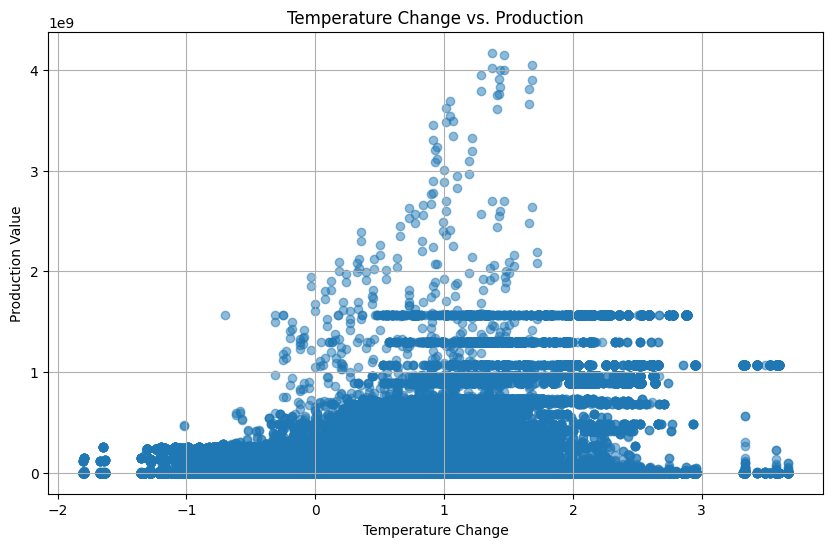

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged['Temperature Change'], merged['production'], alpha=0.5)
plt.title('Temperature Change vs. Production')
plt.xlabel('Temperature Change')
plt.ylabel('Production Value')
plt.grid(True)
plt.show()


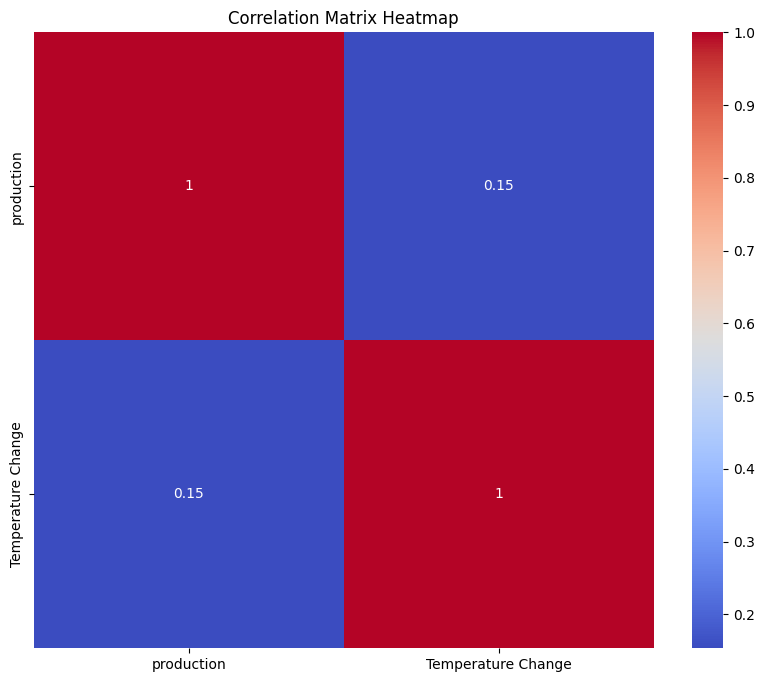

In [64]:
numeric_columns = merged.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

 while there is a slight tendency for production to increase with temperature change, the relationship is not very strong, indicating that other factors likely play a significant role in determining production values.







---



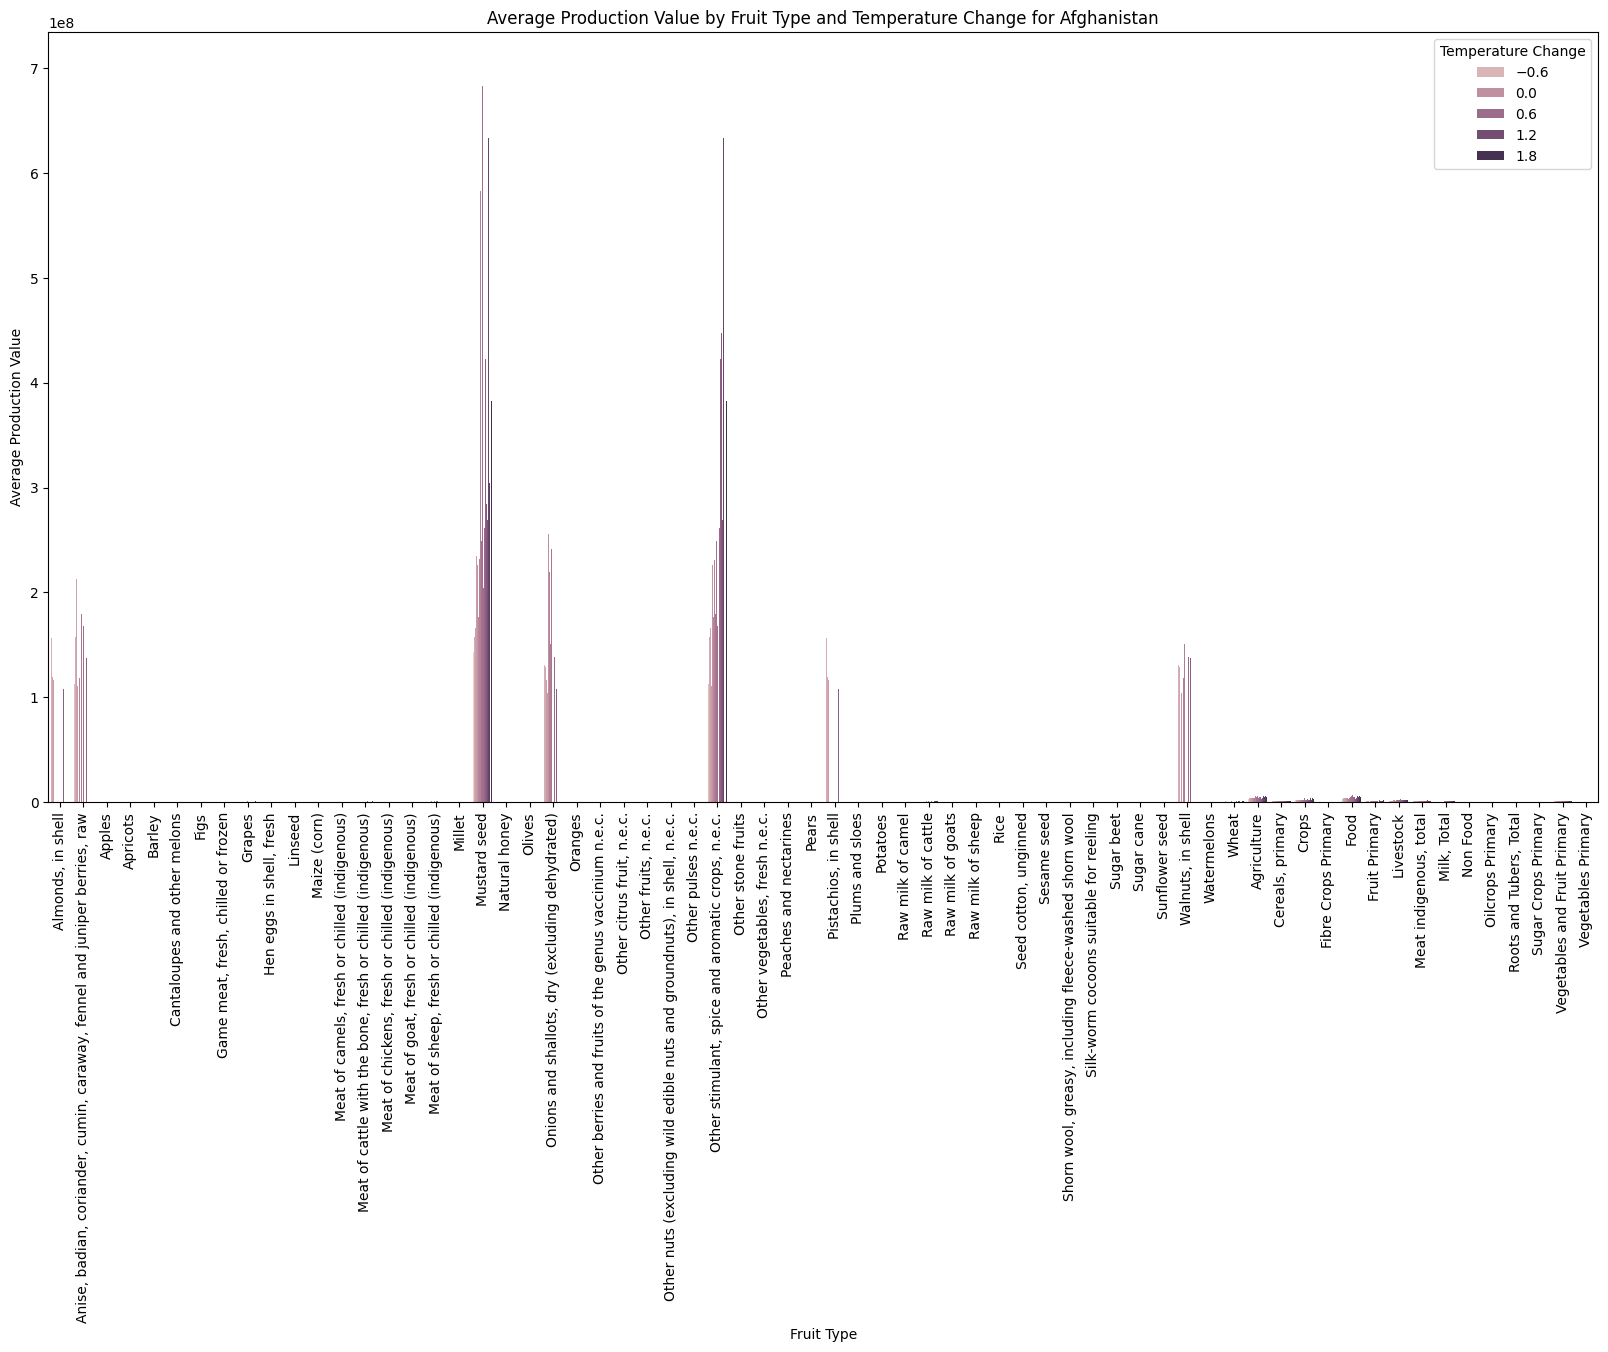

In [51]:
country = 'Afghanistan'
country_data = merged[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [52]:
correlation = country_data['Temperature Change'].corr(country_data['production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Afghanistan: -0.034754917132666034
Average Production by Fruit Type in Afghanistan:
Item
Agriculture                                                                  4.230142e+06
Almonds, in shell                                                            3.125898e+07
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    6.324260e+07
Apples                                                                       2.600915e+04
Apricots                                                                     4.756663e+04
                                                                                 ...     
Vegetables Primary                                                           2.458857e+05
Vegetables and Fruit Primary                                                 1.097169e+06
Walnuts, in shell                                                            3.119325e+07
Watermelons                                 

**This analysis investigates the relationship between temperature change and agricultural production in Afghanistan. The correlation coefficient of -0.0348 indicates almost no linear relationship between the two variables. Additionally, the average production values for various fruit types were calculated, revealing that crops like almonds and juniper berries have the highest average production values. These insights help understand how different crops are affected by climate changes in Afghanistan**

lets try another country

In [53]:
merged['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', '

Germany


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


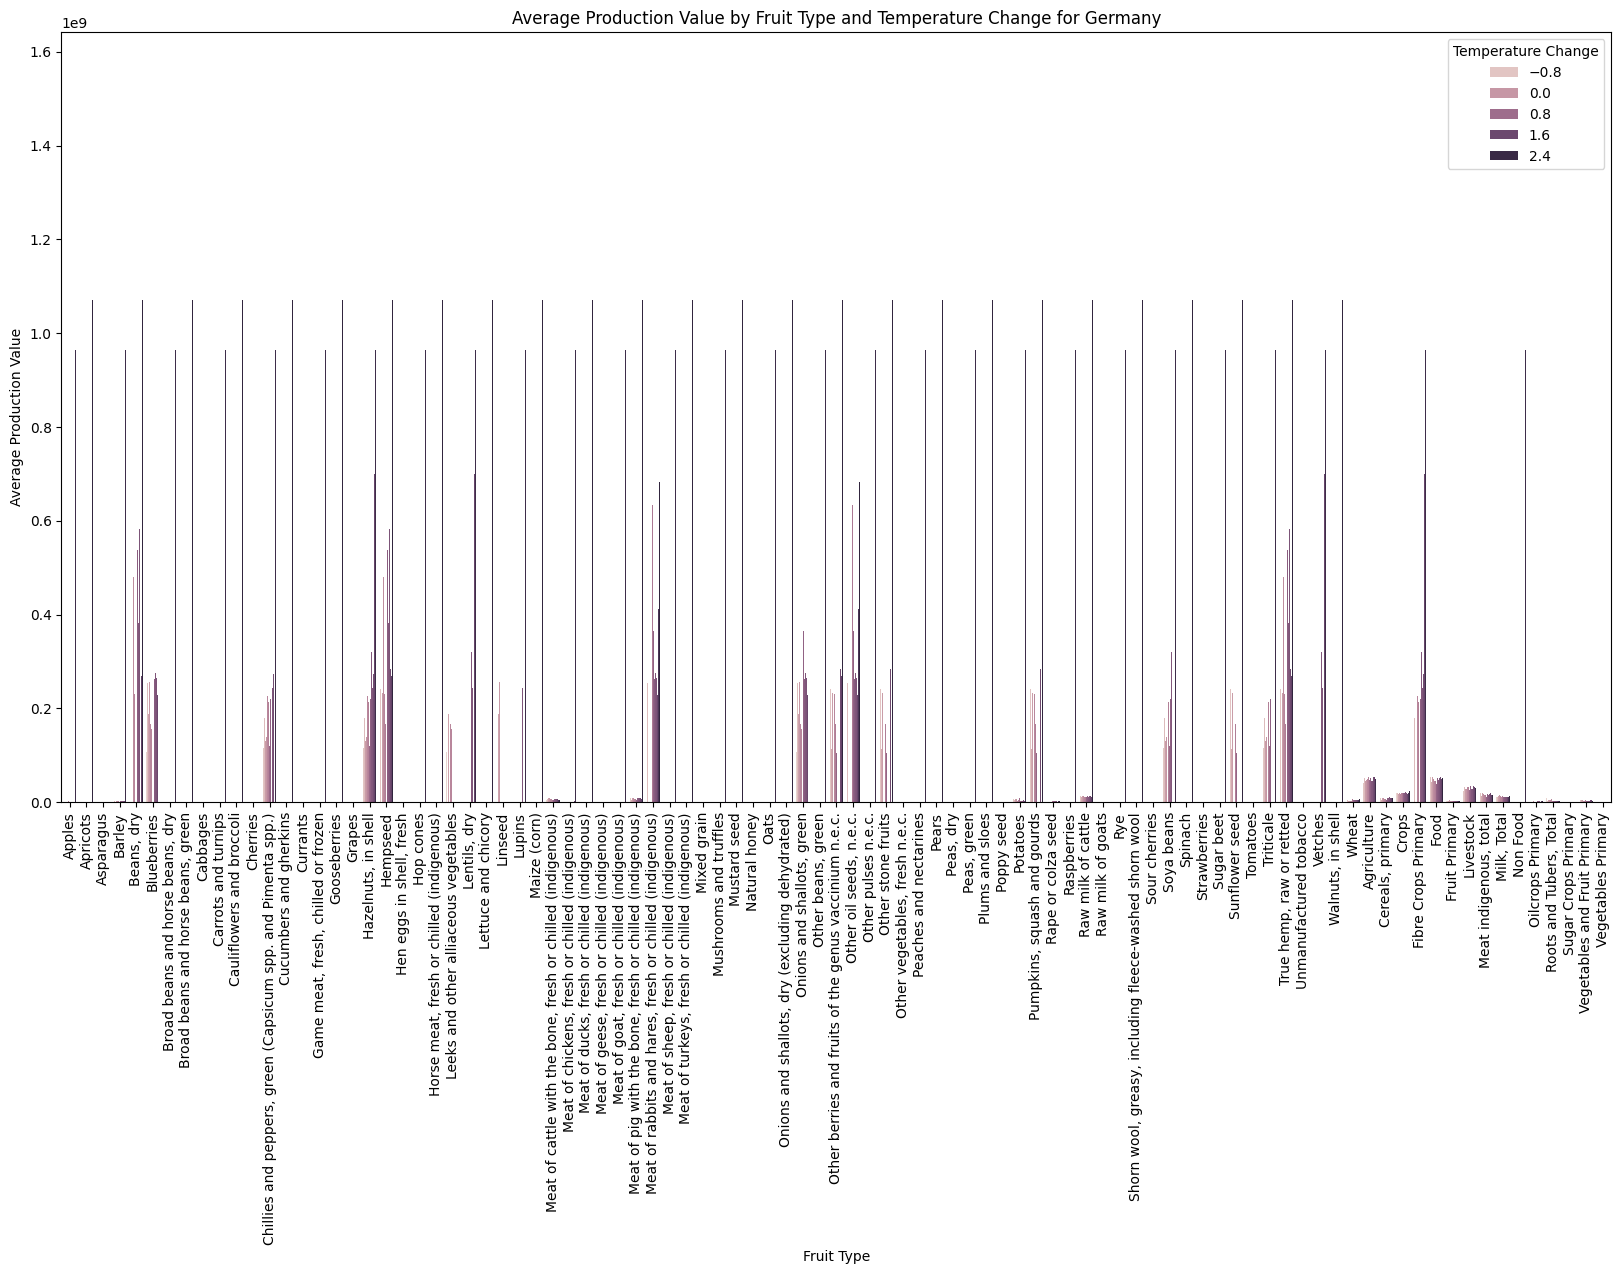

In [58]:
country = np.random.choice(merged['Area'].unique())
print(country)
country_data = merged[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [60]:

correlation = country_data['Temperature Change'].corr(country_data['production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Germany: 0.41278214977452105
Average Production by Fruit Type in Germany:
Item
Agriculture                     4.915764e+07
Apples                          9.409121e+07
Apricots                        9.339286e+07
Asparagus                       9.343174e+07
Barley                          9.531534e+07
                                    ...     
Vegetables Primary              1.082408e+06
Vegetables and Fruit Primary    4.040042e+06
Vetches                         2.526728e+08
Walnuts, in shell               9.343091e+07
Wheat                           9.680696e+07
Name: production, Length: 93, dtype: float64


In [81]:
land_cover.rename(columns = {'Country':'Area'},inplace = True)
land_cover.head()


<ipython-input-81-4284531dcb03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_cover.rename(columns = {'Country':'Area'},inplace = True)


,Area,Indicator,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,...,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,Advanced Economies,Climate Altering Land Cover Index,95.942016,97.027517,97.030493,97.339731,97.462165,97.529704,97.691446,98.144863,...,99.903233,99.963105,99.978710,99.996285,100.0,100.010114,100.076907,100.229096,100.355972,100.394188
1,Advanced Economies excluding US,Climate Altering Land Cover Index,94.851414,96.800658,96.767106,97.090049,97.172806,97.218736,97.319020,97.916400,...,100.051718,100.104101,100.069837,100.032246,100.0,99.979035,100.007709,99.995467,100.020988,100.058737
2,Africa,Climate Altering Land Cover Index,91.590697,93.557008,93.500134,94.266184,94.532599,94.914910,95.300060,96.344889,...,98.793984,100.076777,100.086539,99.972989,100.0,99.840223,99.802754,99.725391,99.758857,99.864541
3,Americas,Climate Altering Land Cover Index,92.924554,93.023248,92.940142,94.263051,94.632936,94.902416,95.405837,96.268190,...,99.025837,99.287572,99.647269,99.784025,100.0,100.229617,100.753590,100.902233,100.997645,101.013420
4,Asia,Climate Altering Land Cover Index,100.417597,100.022963,99.578377,99.613406,99.621526,99.845212,100.065291,100.666319,...,100.133256,99.990573,99.915897,100.009021,100.0,99.723557,99.729292,99.847777,99.709031,99.730813


In [70]:
land_cover = land_cover.loc[:, ~land_cover.columns.str.contains('^Unnamed')]

In [77]:
land_cover.Indicator.unique()

array(['Climate Altering Land Cover Index', 'Total Land Cover',
       'Artificial surfaces (including urban and associated areas)',
       'Grassland', 'Herbaceous crops', 'Inland water bodies',
       'Mangroves', 'Permanent snow and glaciers', 'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Sparsely natural vegetated areas', 'Terrestrial barren land',
       'Tree-covered areas', 'Woody crops'], dtype=object)

In [82]:
land_cover = pd.melt(land_cover,id_vars = ['Area','Indicator'],var_name = 'Year',value_name = 'Value')


In [83]:
land_cover.head()

,Area,Indicator,Year,Value
0,Advanced Economies,Climate Altering Land Cover Index,F1992,95.942016
1,Advanced Economies excluding US,Climate Altering Land Cover Index,F1992,94.851414
2,Africa,Climate Altering Land Cover Index,F1992,91.590697
3,Americas,Climate Altering Land Cover Index,F1992,92.924554
4,Asia,Climate Altering Land Cover Index,F1992,100.417597


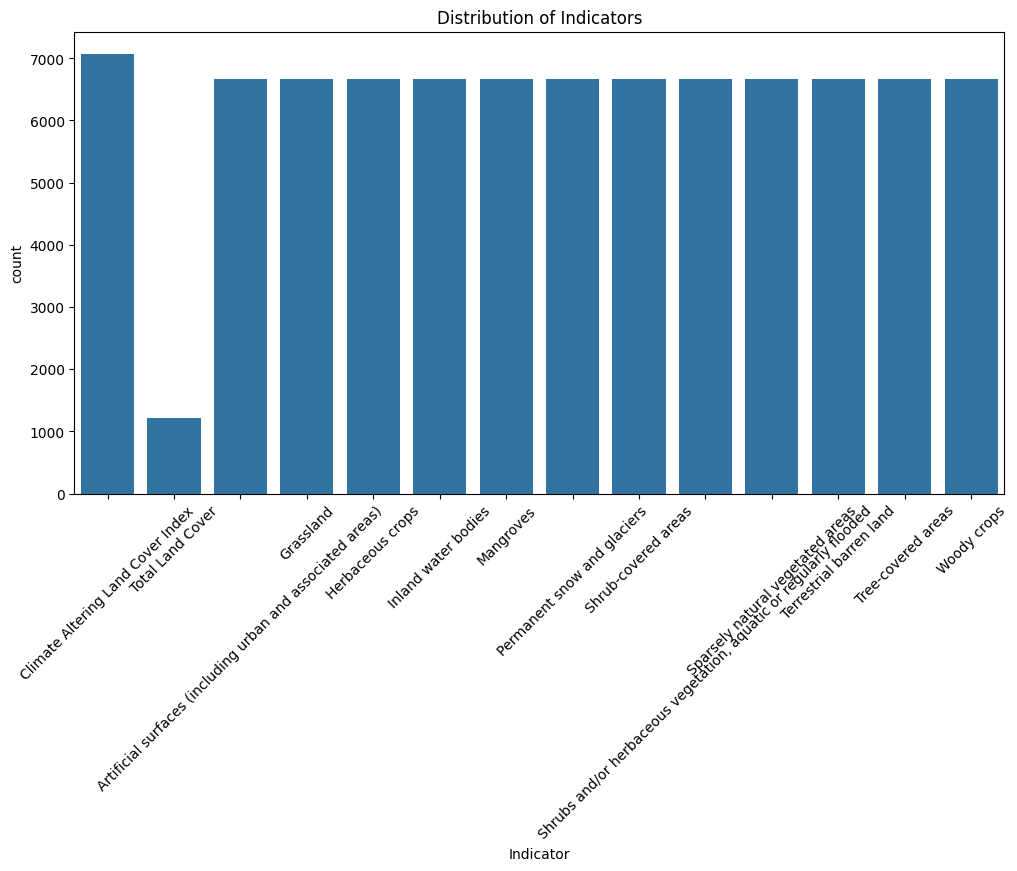

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Indicator', data=land_cover)
plt.xticks(rotation=45)
plt.title('Distribution of Indicators')
plt.show()


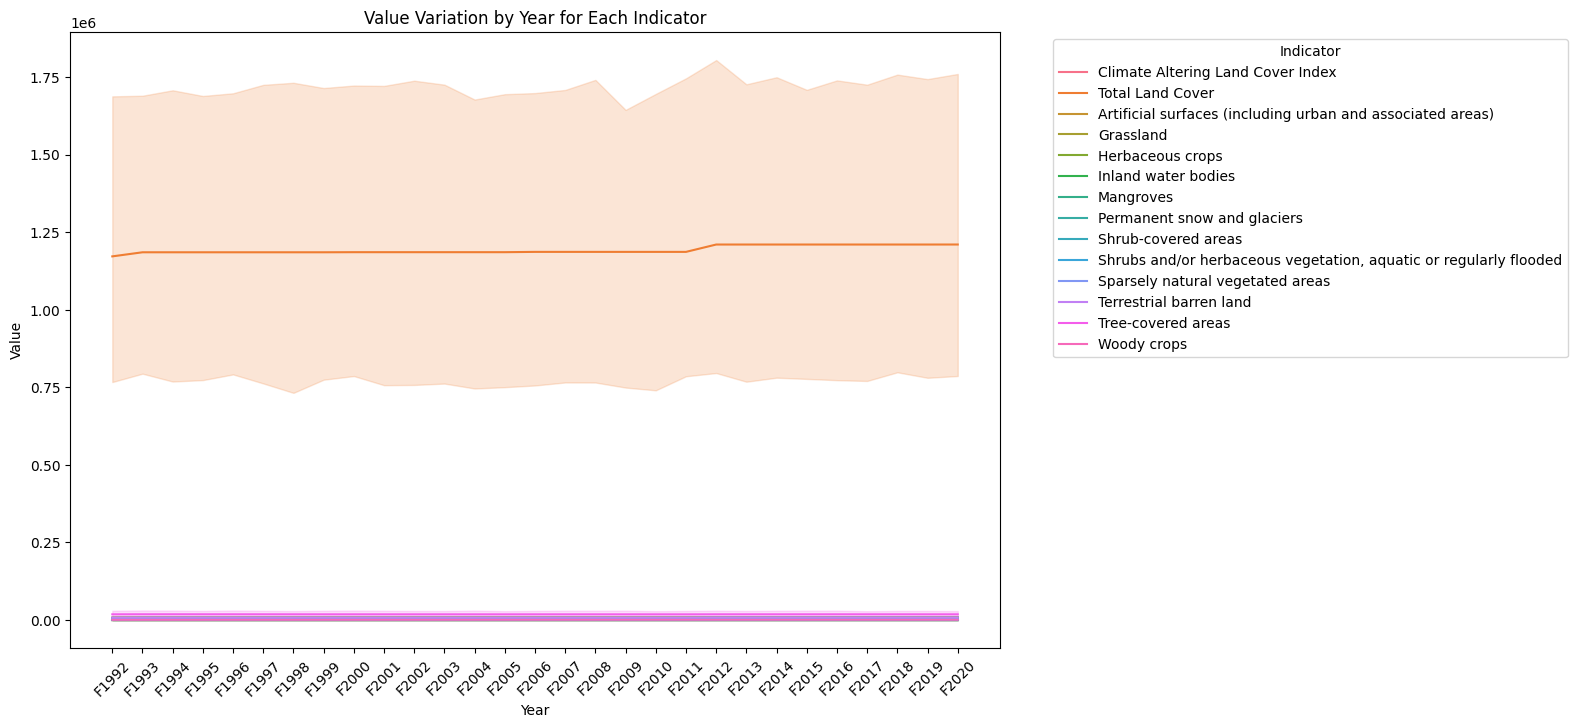

In [86]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Indicator', data=land_cover)
plt.title('Value Variation by Year for Each Indicator')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [88]:
merged_data = pd.merge(melted_production, land_cover, on=['Area', 'Year'], how='inner')

In [89]:
merged_data.head()

,Area,Item,Year,production,Indicator,Value
